In [74]:
import turicreate

In [ ]:
##load image train and test data 

In [75]:
train_data=turicreate.SFrame('~/image_train_data')
test_data=turicreate.SFrame('~/image_test_data')

In [76]:
train_data_copy=train_data.copy()
test_data_copy=test_data.copy()

In [77]:
train_data_copy.head(3)

id,image,label,deep_features,image_array
24,Height: 32 Width: 32,bird,"[0.24287176132202148,1.0954537391662598, 0.0, ...","[73.0, 77.0, 58.0, 71.0,68.0, 50.0, 77.0, 69.0, ..."
33,Height: 32 Width: 32,cat,"[0.5250879526138306, 0.0,0.0, 0.0, 0.0, 0.0, ...","[7.0, 5.0, 8.0, 7.0, 5.0,8.0, 5.0, 4.0, 6.0, 7.0, ..."
36,Height: 32 Width: 32,cat,"[0.5660159587860107, 0.0,0.0, 0.0, 0.0, 0.0, ...","[169.0, 122.0, 65.0,131.0, 108.0, 75.0, ..."


In [ ]:
##model building for similar image retrieval

In [78]:
knn_model=turicreate.nearest_neighbors.create(train_data_copy,features=['deep_features'],label='id')

Starting brute force nearest neighbors model training.

In [ ]:
##retrieving similar images to first image(bird)

In [79]:
bird=train_data_copy[0:1]

,SArray
0,

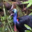

In [80]:
bird['image'].explore()

In [81]:
def get_images_from_ids(query_result):
    return train_data_copy.filter_by(query_result['reference_label'],'id')

In [82]:
bird_neighbors = get_images_from_ids(knn_model.query(bird))

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 9.172ms      |

| Done         |         | 100         | 187.007ms    |

+--------------+---------+-------------+--------------+

,SArray
0,
1,
2,
3,
4,

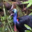
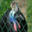
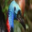
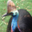
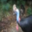

In [83]:
bird_neighbors['image'].explore()